In [1]:
import pandas as pd
import seaborn as sb

import utils

In [2]:
%matplotlib inline

In [3]:
df = pd.read_json(utils.enriched_suas_fname)

In [4]:
df.describe()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,year,year_first_inaugurated
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,16.556894,11.623580,14.142596,47.753628,18.787796,56.591607,8.061496,15.210153,54.486607,1902.263393,1899.830357
std,4.940843,1.184775,3.974475,12.825354,4.393980,10.514515,2.772755,2.581683,5.973769,66.110434,66.103722
min,6.402390,8.646700,5.742900,15.793000,9.749400,35.790422,2.968254,9.666667,42.000000,1789.000000,1789.000000
25%,12.071025,10.836500,10.462525,38.076375,14.899525,46.592939,5.389896,12.958161,51.000000,1844.750000,1844.000000
50%,17.331952,11.940550,14.744300,44.974600,19.584200,58.298902,8.417532,15.803055,55.000000,1904.500000,1901.000000
75%,20.232004,12.367175,17.209975,59.449500,22.063425,64.802624,10.208863,17.187779,57.000000,1959.250000,1953.000000
max,29.316348,14.293300,24.517900,76.676000,30.082500,84.683782,16.525424,21.484992,69.000000,2015.000000,2009.000000


In [5]:
df.head()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,college,num_electoral_votes,occupation,political_party,president,rating _points,state_elected_from,text,year,year_first_inaugurated,years_in_office
0,25.299185,13.2219,21.3326,24.0493,26.9507,74.985507,13.333333,20.175564,57,None,69,Planter,Federalist,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1789,1789,8
1,19.222901,11.9807,16.2845,41.5850,21.3036,62.759342,9.675000,16.747727,57,None,69,Planter,Federalist,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1790,1789,8
2,21.635831,12.9107,18.2947,33.3320,24.2124,67.414287,11.083333,18.874508,57,None,69,Planter,Federalist,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1791,1789,8
3,19.149153,12.2336,16.3275,40.2537,21.6351,62.389844,9.590164,17.165300,57,None,69,Planter,Federalist,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1792,1789,8
4,18.936334,11.6051,16.1922,42.2972,21.0321,60.867484,9.000000,16.476169,57,None,69,Planter,Federalist,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1793,1789,8


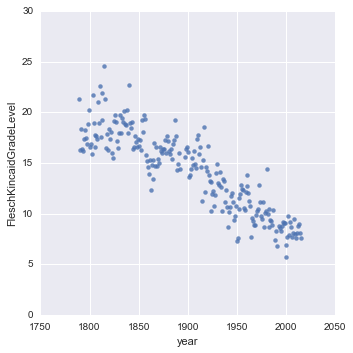

In [6]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df, fit_reg=False)

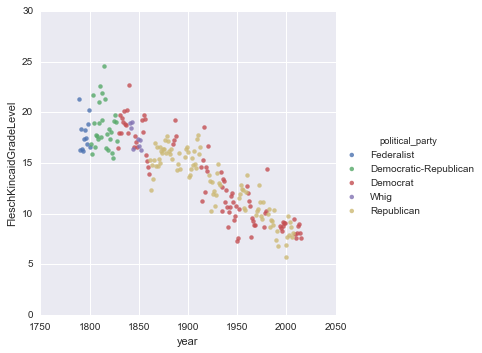

In [7]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df, hue='political_party', fit_reg=False)

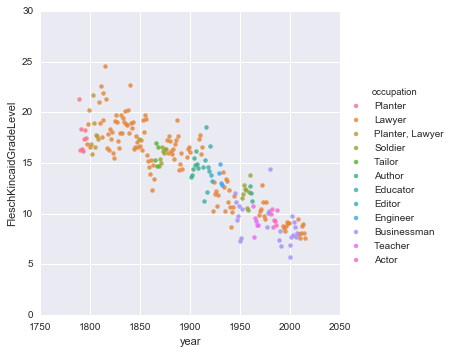

In [8]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df, hue='occupation', fit_reg=False)

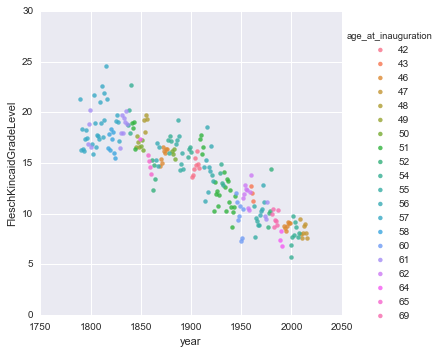

In [9]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df, hue='age_at_inauguration', fit_reg=False)

In [36]:
agg_df = df.groupby(by=['president']).agg({
        'FleschKincaidGradeLevel': 'mean', 
        'year': 'min', 
        'political_party': 'first',
        'occupation': 'first',
})

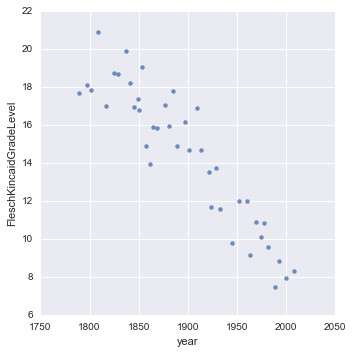

In [37]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=agg_df, fit_reg=False)

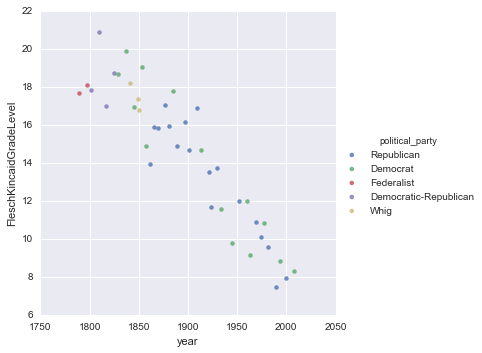

In [38]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=agg_df, hue='political_party', fit_reg=False)

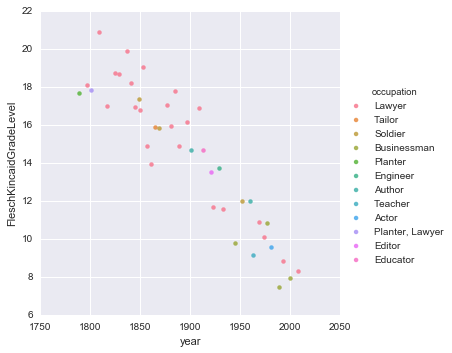

In [39]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=agg_df, hue='occupation', fit_reg=False)

In [41]:
df_1970 = df[df['year'] >= 1970]

In [44]:
df_1970.describe()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,year,year_first_inaugurated
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,10.212428,10.161051,9.053942,64.356187,12.972864,42.859292,4.559508,11.692617,54.977778,1992.777778,1990.488889
std,1.840829,0.965970,1.528300,6.481866,1.693299,4.382729,1.011271,1.114208,8.049531,13.601285,13.320562
min,6.402390,8.646700,5.742900,37.547500,9.749400,35.790422,2.968254,9.666667,46.000000,1970.000000,1969.000000
25%,9.091603,9.567100,8.035300,61.091500,11.655600,40.328991,3.930052,10.905241,47.000000,1981.000000,1981.000000
50%,10.108591,10.106300,8.816900,65.095400,12.663700,42.566603,4.464183,11.532762,54.000000,1994.000000,1993.000000
75%,10.810922,10.724500,9.726000,68.105600,14.005000,45.578875,5.110320,12.419104,61.000000,2004.000000,2001.000000
max,16.354012,14.293300,14.372600,76.676000,18.854100,58.390604,8.391660,15.862177,69.000000,2015.000000,2009.000000


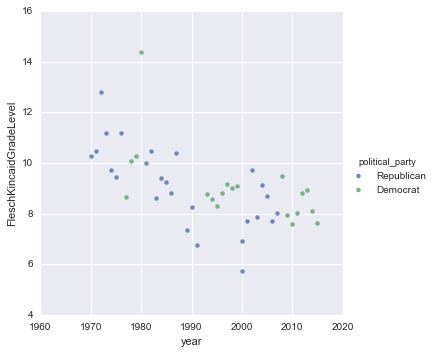

In [42]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df_1970, hue='political_party', fit_reg=False)

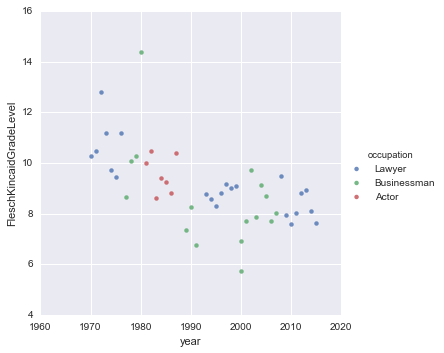

In [43]:
sb.lmplot('year', 'FleschKincaidGradeLevel', data=df_1970, hue='occupation', fit_reg=False)

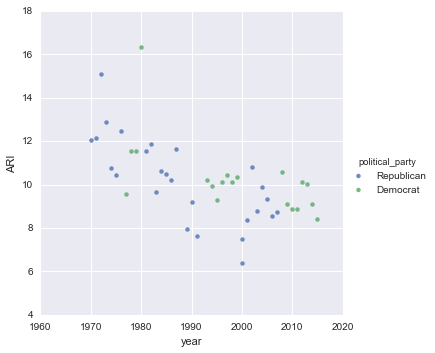

In [49]:
sb.lmplot('year', 'ARI', data=df_1970, hue='political_party', fit_reg=False)